<a href="https://colab.research.google.com/github/Quan21046403/Ai/blob/main/FuzzyHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### Adaptive Food Suggestion Engine by Fuzzy Logic

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=0fb166b9240588e480e854cd51de7885ef4d46628b6334ec185de4a7371863ed
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

5.556234620953465


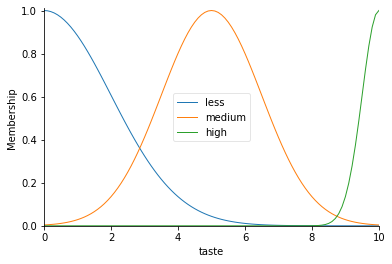

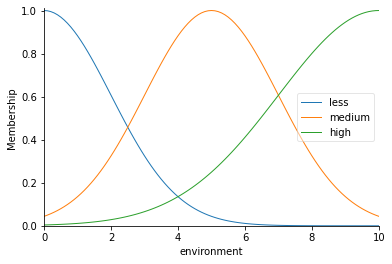

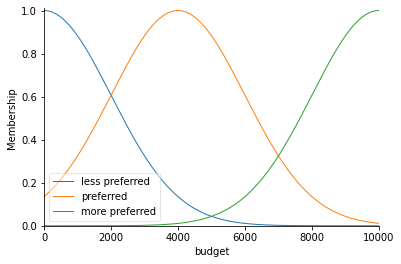

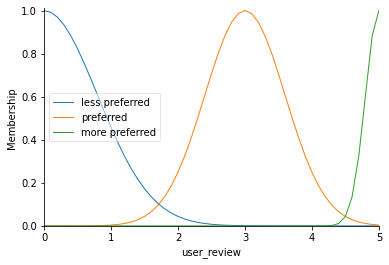

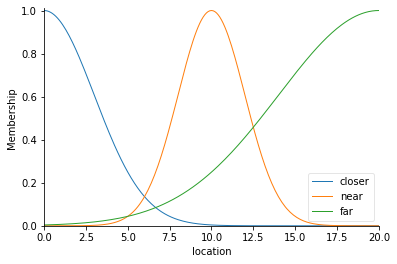

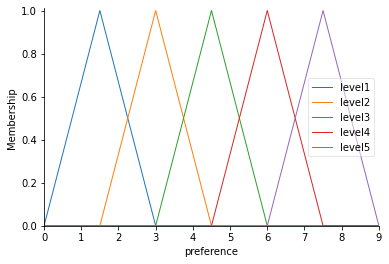

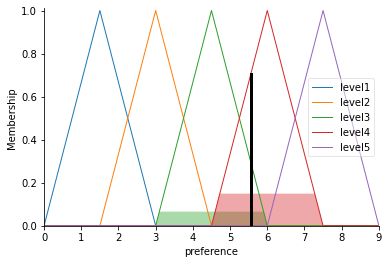

In [6]:
# Define input and output variables 
taste = ctrl.Antecedent(np.arange(0,10.1,0.1), 'taste')
environment = ctrl.Antecedent(np.arange(0,10.1,0.1), 'environment')
budget = ctrl.Antecedent(np.arange(0,10001,1), 'budget')
user_review = ctrl.Antecedent(np.arange(0,5.1,0.1), 'user_review')
location = ctrl.Antecedent(np.arange(0,20.1,0.1), 'location')

preference = ctrl.Consequent(np.arange(0,9.1,0.1), 'preference')

# Set membership functions
taste['less'] = fuzz.gaussmf(taste.universe,0,2)
taste['medium'] = fuzz.gaussmf(taste.universe,5,1.5)
taste['high'] = fuzz.gaussmf(taste.universe,10,0.5)

environment['less']=fuzz.gaussmf(environment.universe,0,2)
environment['medium']=fuzz.gaussmf(environment.universe,5,2)
environment['high']=fuzz.gaussmf(environment.universe,10,3)

budget['less preferred']=fuzz.gaussmf(budget.universe,0,2000)
budget['preferred']=fuzz.gaussmf(budget.universe,4000,2000)
budget['more preferred']=fuzz.gaussmf(budget.universe,10000,2000)

user_review['less preferred']=fuzz.gaussmf(user_review.universe,0,0.8)
user_review['preferred']=fuzz.gaussmf(user_review.universe,3,0.6)
user_review['more preferred']=fuzz.gaussmf(user_review.universe,5,0.2)

location['closer']=fuzz.gaussmf(location.universe,0,3)
location['near']=fuzz.gaussmf(location.universe,10,2)
location['far']=fuzz.gaussmf(location.universe,20,6)

preference['level1'] = fuzz.trimf(preference.universe, [0,1.5,3])
preference['level2'] = fuzz.trimf(preference.universe, [1.5,3,4.5])
preference['level3'] = fuzz.trimf(preference.universe, [3,4.5,6])
preference['level4'] = fuzz.trimf(preference.universe, [4.5,6,7.5])
preference['level5'] = fuzz.trimf(preference.universe, [6,7.5,9])

# Rule 
rule1 = ctrl.Rule(taste['high'] & environment['high'] & budget['more preferred'] & user_review['more preferred'] & location['far'], preference['level5'])
rule2 = ctrl.Rule(taste['medium'] & environment['medium'] & budget['preferred'] & user_review['preferred'] & location['near'], preference['level4'])
rule3 = ctrl.Rule(taste['less'] & environment['less'] & budget['less preferred'] & user_review['less preferred'] & location['closer'], preference['level1'])
rule4 = ctrl.Rule((taste['high'] | environment['high']) & budget['preferred'] & user_review['preferred'], preference['level3'])
rule5 = ctrl.Rule((taste['less'] | environment['less']) & budget['less preferred'] & user_review['less preferred'], preference['level1'])

taste.view()
environment.view()
budget.view()
user_review.view()
location.view()
preference.view()

preference_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
preference_simulation = ctrl.ControlSystemSimulation(preference_ctrl)
preference_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
preference_simulation = ctrl.ControlSystemSimulation(preference_ctrl)
preference_simulation.input['taste'] = 5
preference_simulation.input['environment'] = 3
preference_simulation.input['budget'] = 100
preference_simulation.input['user_review'] = 3
preference_simulation.input['location'] = 10
preference_simulation.compute()
print(preference_simulation.output['preference'])
preference.view(sim=preference_simulation)